In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
df = pd.read_csv("Life Expectancy Data.csv")


In [6]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [9]:
df.shape

(2938, 22)

In [10]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical Columns: Index(['Country', 'Status'], dtype='object')


In [12]:
num_imputer = SimpleImputer(strategy='median')
df_numeric = pd.DataFrame(num_imputer.fit_transform(df[numeric_cols]),
                          columns=numeric_cols)

In [13]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df_categorical = pd.DataFrame(cat_imputer.fit_transform(df[categorical_cols]),
                              columns=categorical_cols)

In [14]:
df_clean = pd.concat([df_numeric, df_categorical], axis=1)

In [15]:
df_clean.isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Country                            0
Status                             0
dtype: int64

In [16]:
df = df.dropna(subset=["Life expectancy "])
X = df_clean.drop("Life expectancy ", axis=1)
y = df_clean["Life expectancy "]


In [17]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

In [18]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", TargetEncoder(cols=cat_cols), cat_cols)
    ]
)

In [20]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline 


lasso_selector = Pipeline([
    ("preprocess", preprocess),
    ("selector", SelectFromModel(Lasso(alpha=0.01, max_iter=1000)))
])

lasso_selector.fit(X, y)

,steps,"[('preprocess', ...), ('selector', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [21]:
mask_lasso = lasso_selector.named_steps["selector"].get_support()

feature_names = lasso_selector.named_steps["preprocess"].get_feature_names_out()
selected_features = feature_names[mask_lasso]

print("Selected Features by LASSO:")
print(selected_features)

Selected Features by LASSO:
['num__Year' 'num__Adult Mortality' 'num__Alcohol'
 'num__percentage expenditure' 'num__Hepatitis B' 'num__Measles '
 'num__ BMI ' 'num__under-five deaths ' 'num__Polio' 'num__Diphtheria '
 'num__ HIV/AIDS' 'num__GDP' 'num__ thinness 5-9 years'
 'num__Income composition of resources' 'num__Schooling' 'cat__Country'
 'cat__Status']


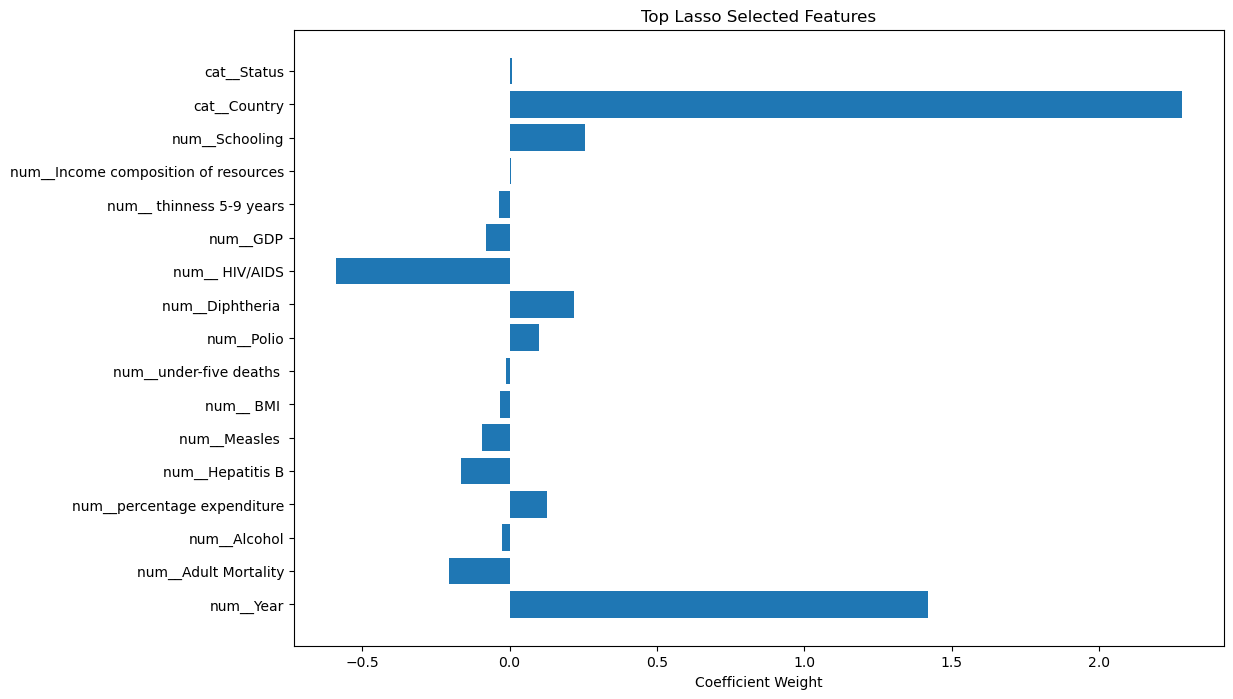

In [22]:
import matplotlib.pyplot as plt
lasso_model = Pipeline([
    ("preprocess", preprocess),
    ("model", Lasso(alpha=0.01, max_iter=1000))
])

lasso_model.fit(X, y)

feature_names = lasso_model.named_steps["preprocess"].get_feature_names_out()
coeff = lasso_model.named_steps["model"].coef_

# Plot non-zero coefficients
non_zero_idx = coeff != 0

plt.figure(figsize=(12, 8))
plt.barh(feature_names[non_zero_idx][:20], coeff[non_zero_idx][:20])
plt.xlabel("Coefficient Weight")
plt.title("Top Lasso Selected Features")
plt.show()

In [23]:
X_selected = lasso_selector.named_steps["preprocess"].transform(X)[:, mask_lasso]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
y_pred = lr.predict(X_test)

In [27]:
r2_lr = r2_score(y_test, y_pred)
mae_lr= mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression Performance:")
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

Linear Regression Performance:
R²: 0.9628
MAE: 1.1681
RMSE: 1.7944


In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
param_dist = {
    'n_estimators': range(50, 600)
}

rf = RandomForestRegressor(random_state=42)
search = RandomizedSearchCV(rf, param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error')
search.fit(X_selected, y)

print(search.best_params_)

{'n_estimators': 593}


In [35]:
rf = RandomForestRegressor(n_estimators=593, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,593
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
y_pred_rf = rf.predict(X_test)

In [38]:
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

In [39]:
print("Random Forest Performance:\n")
print(f"R²={r2_rf:.4f}, MAE={mae_rf:.4f}, RMSE={rmse_rf:.4f}")

Random Forest Performance:

R²=0.9777, MAE=0.8086, RMSE=1.3890


In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint, uniform

gb = GradientBoostingRegressor(random_state=42)

param_dist = {
    'n_estimators': randint(50, 500),        
    'learning_rate': uniform(0.01, 0.1),     
    'max_depth': randint(2, 6)               
}

random_search = RandomizedSearchCV(
    gb,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_selected, y)

print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'learning_rate': 0.025601864044243652, 'max_depth': 4, 'n_estimators': 264}


In [44]:
gb = GradientBoostingRegressor(n_estimators=264, random_state=42)
gb.fit(X_train, y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,264
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [45]:
y_pred_gb = gb.predict(X_test)

In [46]:
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

In [47]:
print("Gradient Boosting Performance:\n")
print(f"R²={r2_gb:.4f}, MAE={mae_gb:.4f}, RMSE={rmse_gb:.4f}")

Gradient Boosting Performance:

R²=0.9720, MAE=0.9917, RMSE=1.5584


In [50]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42)

param_dist = {
    'n_estimators': randint(100, 600),          
    'learning_rate': uniform(0.001, 0.2),       
    'max_depth': randint(3, 12),                
    'subsample': uniform(0.5, 0.5),             
    'colsample_bytree': uniform(0.5, 0.5)       
}

search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

search.fit(X_selected, y)

print("Best Params:", search.best_params_)
print("Best Score:", search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Params: {'colsample_bytree': 0.7361074625809747, 'learning_rate': 0.024918849187660342, 'max_depth': 5, 'n_estimators': 356, 'subsample': 0.8608647605824367}
Best Score: -3.4084575521255163


In [64]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(
    n_estimators=356,
    learning_rate=0.024918849187660342,
    max_depth=5,
    subsample=0.86086476,
    colsample_bytree=0.7361074625809747,
    random_state=42
)

xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7361074625809747
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [65]:
y_pred = xgb_model.predict(X_test)

In [66]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2_xgb = r2_score(y_test, y_pred)

In [67]:
print("XGBoost Regression Results:")
print(f"MAE  : {mae:.4f},MSE : {mse:.4f} , RMSE : {rmse:.4f} ,R² : {r2_xgb:.4f}")

XGBoost Regression Results:
MAE  : 0.8740,MSE : 1.9990 , RMSE : 1.4139 ,R² : 0.9769


In [68]:
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Predicted')

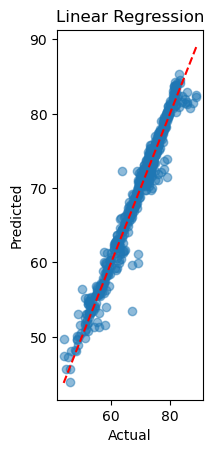

In [69]:
plt.subplot(1, 3, 1)
plt.scatter(y_test, lr.predict(X_test), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")


Text(0, 0.5, 'Predicted')

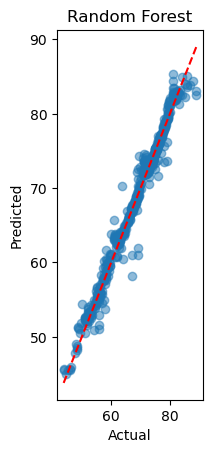

In [70]:
plt.subplot(1, 3, 2)
plt.scatter(y_test, rf.predict(X_test), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest")
plt.xlabel("Actual")
plt.ylabel("Predicted")

Text(0, 0.5, 'Predicted')

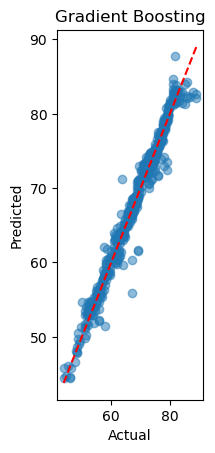

In [71]:
plt.subplot(1, 3, 3)
plt.scatter(y_test, gb.predict(X_test), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Gradient Boosting")
plt.xlabel("Actual")
plt.ylabel("Predicted")

Text(0, 0.5, 'Predicted')

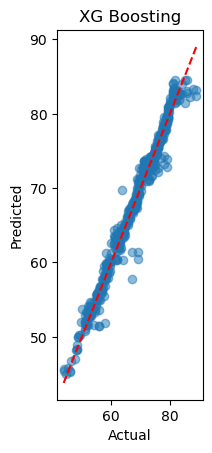

In [72]:
plt.subplot(1, 3, 3)
plt.scatter(y_test, xgb_model.predict(X_test), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("XG Boosting")
plt.xlabel("Actual")
plt.ylabel("Predicted")

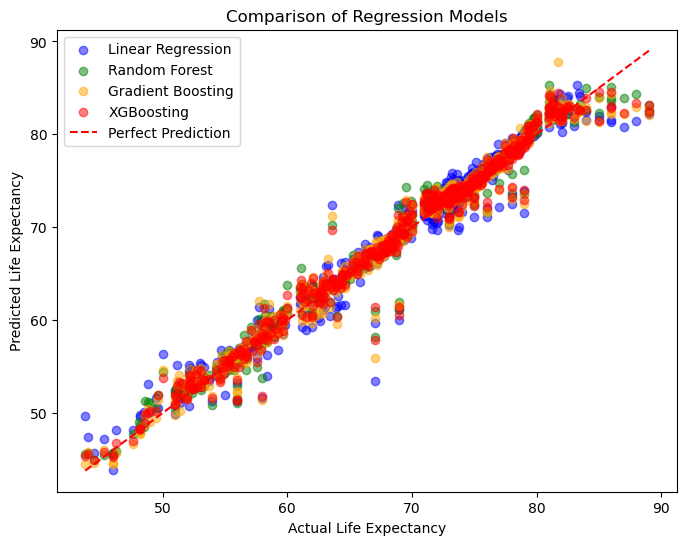

In [73]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, lr.predict(X_test), alpha=0.5, label='Linear Regression', color='blue')
plt.scatter(y_test, rf.predict(X_test), alpha=0.5, label='Random Forest', color='green')
plt.scatter(y_test, gb.predict(X_test), alpha=0.5, label='Gradient Boosting', color='orange')
plt.scatter(y_test, xgb_model.predict(X_test), alpha=0.5, label='XGBoosting', color='red')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Comparison of Regression Models')
plt.legend()
plt.show()

In [74]:
r2_scores = {
    "Linear": r2_lr,
    "RandomForest": r2_rf,
    "GradientBoost": r2_gb,
    "XGBoost": r2_xgb
}


In [75]:
models = list(r2_scores.keys())
scores = list(r2_scores.values())


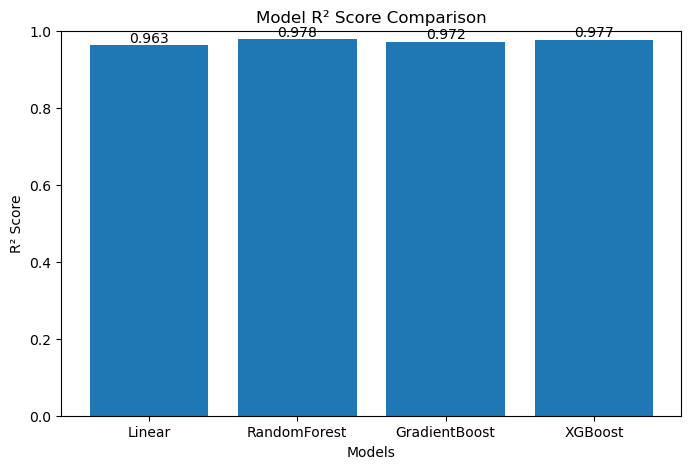

In [76]:
plt.figure(figsize=(8, 5))
bars = plt.bar(models, scores)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.3f}", ha='center', va='bottom')

plt.title("Model R² Score Comparison")
plt.ylabel("R² Score")
plt.xlabel("Models")
plt.ylim(0, 1) 

plt.show()

In [77]:
import pickle
with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocess, f)
with open("selected_features.pkl", "wb") as f:
    pickle.dump(selected_features, f)
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)
print("pickle files saved successfully")


pickle files saved successfully
